Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 638 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 12769 transaction(s)] done [0.00s].
sorting and recoding items ... [15 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [50 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


png 
  2

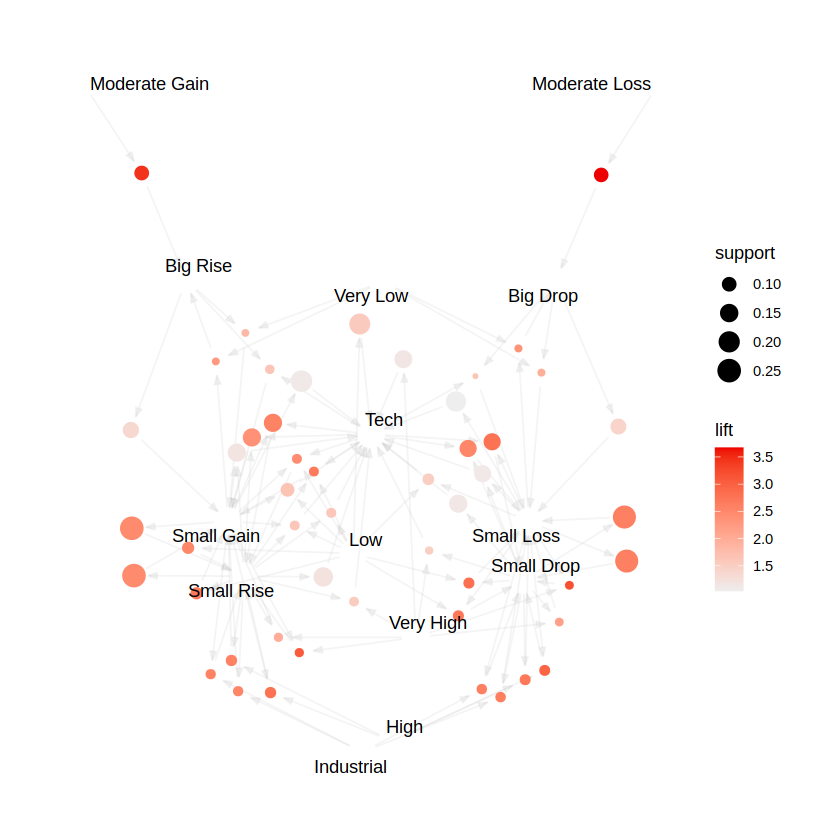

In [15]:
# Load required libraries
library(arules)
library(arulesViz)

# Convert dataset into transactions format
df_trans <- as(df, "transactions")

# Preprocess Dataset: Remove Column Names from Labels Before Running Apriori
colnames(df_trans) <- gsub(".*=", "", colnames(df_trans))  # Remove everything before "="

# Apply Apriori Algorithm
rules <- apriori(df_trans, parameter = list(supp = 0.05, conf = 0.5, minlen = 2, target = "rules"))

# Visualize the association rules as a graph (Without Column Names)
plot(rules, method="graph", control=list(type="items"))

# Save the visualization as a file (Without Column Names)
png("ARM_Network_Cleaned.png")
plot(rules, method="graph", control=list(type="items"))
dev.off()


In [14]:
# Install required packages if not already installed
if (!require("arules")) install.packages("arules", repos="http://cloud.r-project.org")
if (!require("arulesViz")) install.packages("arulesViz", repos="http://cloud.r-project.org")
if (!require("visNetwork")) install.packages("visNetwork", repos="http://cloud.r-project.org")

# Load libraries
library(arules)
library(arulesViz)
library(visNetwork)

# 🔹 Load the dataset without treating the first row as column names (header = FALSE)
data_path <- "ARM_data.csv"  # Update if needed
df <- read.csv(data_path, header = FALSE, stringsAsFactors = TRUE)

# 🔹 Remove the first row (which contains aliases/column names as data)
df <- df[-1, ]

# 🔹 Set the column names from the first row (if necessary)
colnames(df) <- as.character(unlist(df[1, ]))
df <- df[-1, ]  # Remove the row with column names

# 🔹 Convert DataFrame into transactions format
df_trans <- as(df, "transactions")

# 🔹 Apply Apriori Algorithm
rules <- apriori(df_trans, parameter = list(supp = 0.05, conf = 0.5, minlen = 2, target = "rules"))

# 🔹 Sort and filter the top 10 rules by Lift
top_rules <- head(sort(rules, by="lift"), 10)

# 🔹 Interactive Visualization of Association Rules
plot(top_rules, method="graph", engine="htmlwidget")

# Save the visualization as an interactive HTML file
htmlwidget::saveWidget(plot(top_rules, method="graph", engine="htmlwidget"), "ARM_Network_Interactive.html")


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 638 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 12769 transaction(s)] done [0.00s].
sorting and recoding items ... [15 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [50 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


HTML widgets cannot be represented in plain text (need html)

ERROR: Error in loadNamespace(x): there is no package called ‘htmlwidget’
